In [20]:
%reset
'''
Time series analysis.
Dataset showing honey production numbers and prices by state from 1998-2012
https://www.kaggle.com/balarka/honey-productionanalysis-usa/data

- numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. 
It is possible to take honey from colonies which did not survive the entire year
- yieldpercol: Honey yield per colony. Unit is pounds
- totalprod: Total production (numcol x yieldpercol). Unit is pounds
- stocks: Refers to stocks held by producers. Unit is pounds
- priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
- prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.

Other useful information: 
Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. 
Due to rounding, total colonies multiplied by total yield may not equal production. 
Also, summation of states will not equal U.S. level value of production.

1. How has honey production yield changed from 1998 to 2012?
2. Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?
3. Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, 
    which was when concern over Colony Collapse Disorder spread nationwide?
4. Are there any patterns that can be observed between total honey production and value of production every year?
    How has value of production, which in some sense could be tied to demand, changed every year?
'''

'\nTime series analysis.\nDataset showing honey production numbers and prices by state from 1998-2012\n\nyieldpercol: Yield per colony (lbs)\ntotalprod: Total production (numcol*yieldpercol), (lbs)\nstocks: Stocks held by producers on Dec 15 (lbs)\npriceperlb: Average price per pound ($)\nprodvalue: Value of production (totalprod*prodvalue), ($)\nyear: Year the data pertains to\n\n1. How has honey production yield changed from 1998 to 2012?\n2. Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?\n3. Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, \n    which was when concern over Colony Collapse Disorder spread nationwide?\n4. Are there any patterns that can be observed between total honey production and value of production every year?\n    How has value of production, which in some sense could be tied to demand, changed every year?\n'

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='once')

In [22]:
data_raw = pd.read_csv('honeyproduction.csv')
data_raw.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [37]:
def data_transformation(data_raw):
    result = data_raw.copy()
    result = result.rename(columns={
        'numcol': 'no_colonies',
        'yieldpercol': 'yield_per_colony',
        'totalprod': 'production_total',
        'stocks': 'stocks',
        'priceperlb': 'price_per_lb',
        'prodvalue': 'production_value',
        'year': 'year'})
    return result

data = data_transformation(data_raw)
data.head()

,state,no_colonies,yield_per_colony,production_total,stocks,price_per_lb,production_value,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [106]:
def show_yield_trend(df, state=None):
    if state:
        viz = df[df['state'] == state].copy()
    else:
        viz = df.copy()
    data_yield_total = viz[['year', 'yield_per_colony']].groupby('year').agg('sum')
    plt.figure(figsize=(10,3))
    plt.plot(data_yield_total)

# How has honey production yield changed from 1998 to 2012?

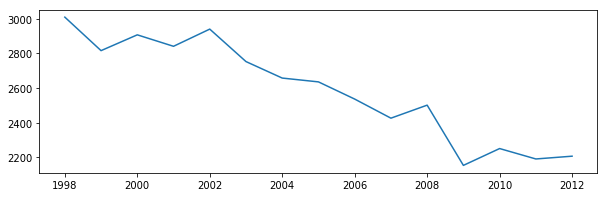

In [108]:
show_yield_trend(data)

# Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?

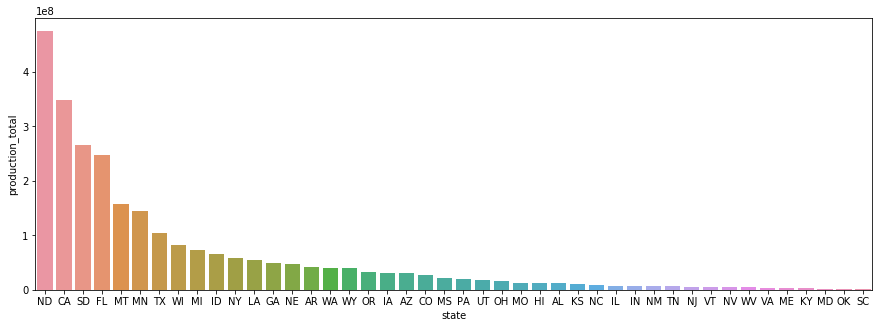

In [67]:
viz = (data[['production_total', 'state']]
       .groupby('state')
       .agg('sum').sort_values('production_total', ascending=False).reset_index())
plt.figure(figsize=(15,5))
sns.barplot(x='state', y='production_total', data=viz)

In [130]:
# Calculation of percentage change over time.
# Methodology:
# 1. Calculate % change by year and by state.
# 2. Sum all % changes over time.
# 3. Show top positive and negative % changes by state.

def _get_diffence_by_state(df, state):
    tmp = data.loc[df['state'] == state, ['yield_per_colony', 'year']]
    tmp['rolling_diff'] = (tmp['yield_per_colony']
                           .rolling(window=2)
                           .apply(lambda x: ((x[1] - x[0]) / x[1]) * 100, raw=True))
    return tmp['rolling_diff'].sum()

list_of_states = list(data['state'].value_counts().index)
diffence_by_state = []
for state in list_of_states:
    tmp = (state, _get_diffence_by_state(data, state))
    diffence_by_state.append(tmp)
    
pd.DataFrame(diffence_by_state, columns=['state', 'yield_change']).sort_values(by='yield_change')

,state,yield_change
32,CA,-177.504990
12,MT,-148.186553
5,SD,-126.916349
13,NJ,-110.874418
15,IN,-98.177429
18,ID,-95.104055
19,HI,-87.969060
4,ND,-82.221682
21,UT,-80.524133
37,NC,-69.991704


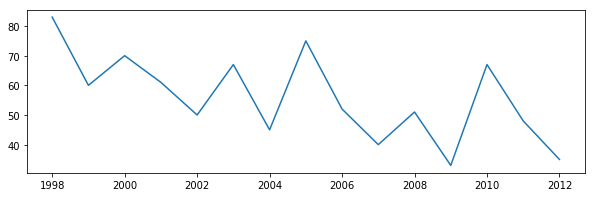

In [131]:
show_yield_trend(data, 'CA')

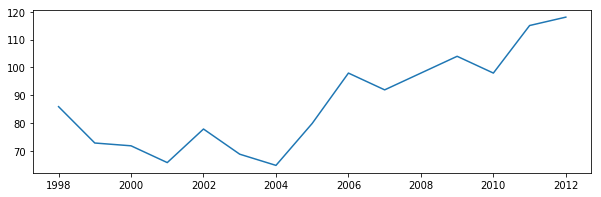

In [133]:
show_yield_trend(data, 'MS')

# Auxilary data analysis

In [4]:
analysis = data_raw.copy()

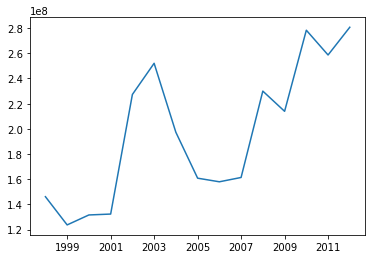

In [5]:
total_production = analysis[['year', 'prodvalue']].groupby('year').agg('sum')
total_production.index = [str(x) + '-01-01' for x in list(total_production.index)]
total_production.index = pd.to_datetime(total_production.index)
plt.plot(total_production)

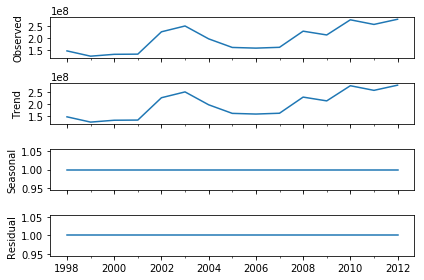

In [19]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(total_production, model='multiplicative')
result.plot()
plt.show()
# We have no seasonality in our time serires.